In [47]:
'''
Frames
Matrices, Vector Norms, Eigenvectors and Eigenvalues
Matrix Decompositions (SVD)
Singular Value Decomposition Applications
Jacobians
ODE I
ODE II
Basics of probability
Bayesian reasoning
Random variables
Joint random variables + covariance
'''


'\nFrames\nMatrices, Vector Norms, Eigenvectors and Eigenvalues\nMatrix Decompositions (SVD)\nSingular Value Decomposition Applications\nJacobians\nODE I\nODE II\nBasics of probability\nBayesian reasoning\nRandom variables\nJoint random variables + covariance\n'

In [2]:
# Jacobian
import sympy as sp
x, y, z= sp.symbols('x, y, z')
equation_1 = x ** 4 +  y ** 3 + z ** 2 + 2 * x * y + 2 * y * z + 2 * z * x
equation_2 = sp.sin(x ** 2) + sp.cos(y ** 2) + sp.tan(z ** 2)

matrix = sp.Matrix([equation_1, equation_2])
display(matrix.jacobian([x, y, z]))

Matrix([
[4*x**3 + 2*y + 2*z, 2*x + 3*y**2 + 2*z,        2*x + 2*y + 2*z],
[     2*x*cos(x**2),     -2*y*sin(y**2), 2*z*(tan(z**2)**2 + 1)]])

In [48]:
import numpy as np
cos=np.cos
sin=np.sin
def rx(theta):
    return np.array(([1,0,0],[0,cos(theta),-sin(theta)],[0,sin(theta),cos(theta)]))

def ry(theta):
    return np.array(([cos(theta),0,sin(theta)],[0,1,0],[-sin(theta),0,cos(theta)]))

def rz(theta):
    return np.array(([cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]))

def homo_trans(R,t):
    # r=np.deg2rad(r)
    # rot_matrix=rz(r[2])@ry(r[1])@rx(r[0])
    t=t[np.newaxis].T
    homogen=np.hstack((R,t))
    homogen=np.vstack((homogen,np.array([0,0,0,1])))     # add[0, 0, 0, 1] at the bottom to make it 4x4
    return homogen
tr_w=homo_trans(rz(np.radians(30.0)),np.array([4.3,5.1,0.0]))
tg_r=homo_trans(ry(np.radians(30.0))@rx(np.radians(15.0)),np.array([0.5,0.0,0.4]))
tg_w=(tr_w@tg_r)
tw_g=np.linalg.inv(tg_w)
tb_w=homo_trans(rz(np.radians(-30.0)),np.array([5.0,5.5,0.2]))
tb_g=tw_g@tb_w
tb_g

array([[ 0.4330127 ,  0.75      , -0.5       ,  0.36519238],
       [-0.77181154,  0.59503485,  0.22414387, -0.00866879],
       [ 0.46562532,  0.28884863,  0.8365163 , -0.01848231],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [49]:
# GIMBAL LOCK
alpha1 = np.pi/8
beta1 = -np.pi/2
gamma1 = -np.pi/4

alpha2 = -np.pi/4
beta2 = -np.pi/2
gamma2 = np.pi/8
p=np.array([1.,1.,1])
p_a = rz(alpha1) @ ry(beta1) @ rx(gamma1).dot(p)
p_b = rz(alpha2) @ ry(beta2) @ rx(gamma2).dot(p)
print(p_a)
print(p_b)

[-0.5411961   1.30656296  1.        ]
[-0.5411961   1.30656296  1.        ]


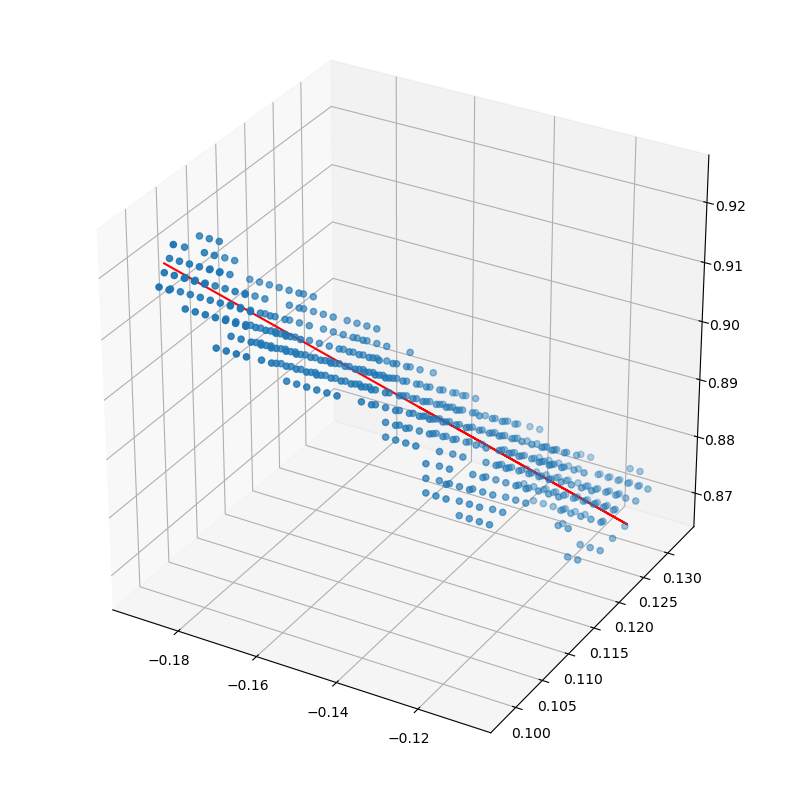

In [50]:
# PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def PCA(matrix):
    cov_mat=np.cov(matrix.T)
    eig_val,eig_vec=np.linalg.eig(cov_mat)
    long=eig_vec.T[np.argmax(eig_val)]
    return long

matrix=np.genfromtxt('data/object.pcd')
long=PCA(matrix)
def plot(axis,matrix,long):
    mean=np.mean(matrix,axis=0)
    diff=matrix-mean
    product=diff@long
    points=np.array([mean,mean+long*np.min(product),mean+long*np.max(product)])
    return axis.plot(points[:,0],points[:,1],points[:,2],'r')
fig=plt.figure(figsize=(10,10))
axis=fig.add_subplot(111,projection='3d')
axis.scatter(matrix[:,0],matrix[:,1],matrix[:,2])
plot(axis, matrix, long)


In [3]:
#fit line
def fit_line(data):
    X=data[:,0]
    Y=data[:,1]
    A=np.hstack((X[np.newaxis].T,np.ones((len(X),1))))
    B=Y[np.newaxis].T
    x=np.linalg.pinv(A)@B
    m = x[0]
    c = x[1]
    return m,c
data=np.load("data/line.npy")

m,c=fit_line(data)
x=np.linspace(np.min(data[:,0])-10,np.max(data[:,0])+10,1000)
y=m*x+c
fig=plt.figure(figsize=(10,10))

plt.scatter(data[:,0], data[:,1])
plt.plot(x, y, color='r', linewidth=2)
plt.show()


NameError: name 'np' is not defined

/tmp/ipykernel_3873/3440764133.py:23: RuntimeWarning: invalid value encountered in sqrt
  radius = np.sqrt(result[2] + a**2 + b**2)


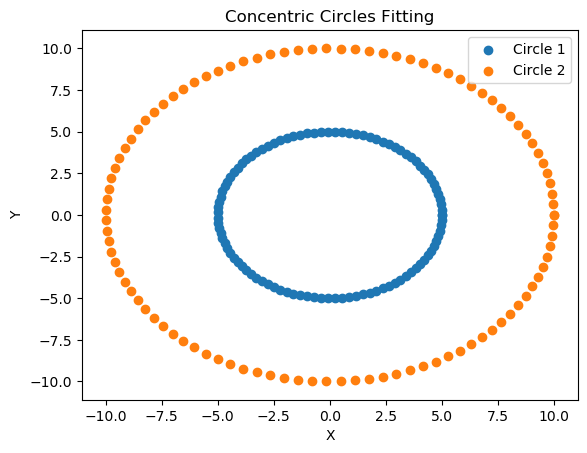

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def fit_circle(X, Y, radius):
    # Generate an array of angles from 0 to 2*pi
    theta = np.linspace(0., 2 * np.pi, 100)
    
    # Construct the matrix A with columns X, Y, and a column of ones
    A = np.hstack((X[np.newaxis].T, Y[np.newaxis].T, np.ones((len(X), 1))))
    
    # Construct the matrix B as the sum of squared X and Y coordinates
    B = (X**2 + Y**2 - radius**2)[np.newaxis].T
    
    # Compute the pseudo-inverse of A
    pseudo_inverse = np.linalg.pinv(A)
    
    # Multiply the pseudo-inverse with B to obtain the result
    result = pseudo_inverse @ B
    
    # Extract the parameters of the circle: a, b, and the radius
    a = result[0] / 2.
    b = result[1] / 2.
    radius = np.sqrt(result[2] + a**2 + b**2)
    
    # Generate new x-coordinates of points on the fitted circle
    x_new = a + radius * np.cos(theta)
    
    # Generate new y-coordinates of points on the fitted circle
    y_new = b + radius * np.sin(theta)
    
    # Return the new x and y coordinates
    return x_new, y_new

# Generate sample data for two concentric circles
radius1 = 5
radius2 = 10
theta1 = np.linspace(0, 2 * np.pi, 100)
theta2 = np.linspace(0, 2 * np.pi, 100)
x1 = radius1 * np.cos(theta1) 
y1 = radius1 * np.sin(theta1) 
x2 = radius2 * np.cos(theta2) 
y2 = radius2 * np.sin(theta2) 

# Create a scatter plot of the original points
plt.scatter(x1, y1, label='Circle 1')
plt.scatter(x2, y2, label='Circle 2')

# Fit and plot the first circle
x1_new, y1_new = fit_circle(x1, y1, radius1)
plt.plot(x1_new, y1_new, color='r', linewidth=2)

# Fit and plot the second circle
x2_new, y2_new = fit_circle(x2, y2, radius2)
plt.plot(x2_new, y2_new, color='g', linewidth=2)

# Set plot title and labels
plt.title('Concentric Circles Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()


In [53]:
# jacobians - contains partial derivates

''' 
Banach fixed point theorem x* for which fx* = x* -- conditions guarantees a fixed point that doesnt move when u apple an operation
Banach's fixed point theorem states that any contraction mapping on a complete metric space has a unique fixed point. In other words, 
if a function maps a metric space to itself and 
the distance between the function's outputs 
decreases with each iteration, then there 
exists a unique point in the space that is 
mapped to itself by the function.
- FINDING FIX POINTS
- F is self mapping, 1 solution exists when F is contraction
- generally found with linear convergence

Newton Taylor's theorem generalizes better to higher dimensions

'''



" \nBanach fixed point theorem x* for which fx* = x* -- conditions guarantees a fixed point that doesnt move when u apple an operation\nBanach's fixed point theorem states that any contraction mapping on a complete metric space has a unique fixed point. In other words, \nif a function maps a metric space to itself and \nthe distance between the function's outputs \ndecreases with each iteration, then there \nexists a unique point in the space that is \nmapped to itself by the function.\n- FINDING FIX POINTS\n- F is self mapping, 1 solution exists when F is contraction\n- generally found with linear convergence\n\nNewton Taylor's theorem generalizes better to higher dimensions\n\n"

In [54]:
# line.npy
# p1 q1 parallel and perpe
# p2 q2 r2 s2

""" 
Parallel
n2*y+n1*x+c1=0
n2*y+n1*x+c2=0

Perpendicular
n2*y+n1*x+c1=0
n1*y-n2*x+c2=0
"""
def clsq (A: np.array, dim: int) -> tuple:
    p = min(A.shape)
    m = p - dim
    Q, R = np.linalg.qr (A, mode='complete')
    _, _, VT = np.linalg.svd (R[m:p, m:p])
    n = VT[dim-1,:]
    c = np.linalg.lstsq(-R[0:m, 0:m], R[0:m, m: p].dot(n),rcond=None)[0]
    return (c, n)

Text(0.5, 1.0, 'Point clouds generated ')

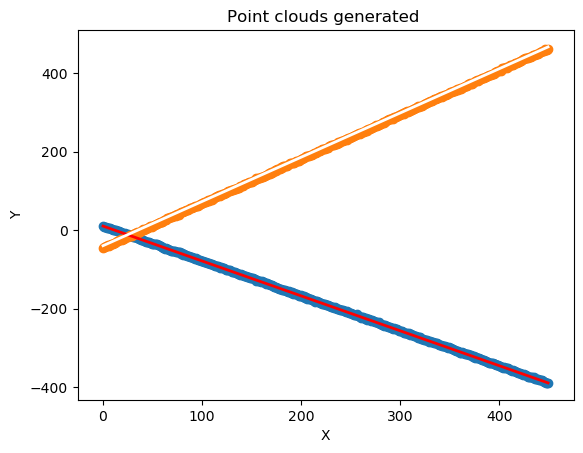

In [55]:
import numpy as np
def perpen(line1,line2):
    px,py=np.array((line1[:,0])),np.array((line1[:,1]))
    qx,qy=np.array((line2[:,0])),np.array((line2[:,1]))
    a1=np.column_stack((np.ones(len(px)),np.zeros(len(px)),px))
    a2=np.column_stack((np.zeros(len(qx)),np.ones(len(qx)),qy))
    a=np.vstack((a1,a2))
    b1=py[np.newaxis].T
    b2=-qx[np.newaxis].T
    b=np.vstack((b1,b2))
    result=np.linalg.pinv(a) @ b
    return result

p=np.load("data/P2.npy")
q=np.load("data/Q2.npy")
c1,c2,slope=perpen(p,q)

y1=slope*p[:,0] + c1
y2=(-1/slope)*q[:,0] + c2

plt.scatter(p[:,0], p[:,1])
plt.scatter(q[:,0], q[:,1])
plt.plot(p[:,0], y1, color='r', label='Perpendicular line 1',linewidth=2)
plt.plot(q[:,0], y2, color='w', label='Perpendicular line 2',linewidth=2)

# Add labels and title to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point clouds generated ')

(array([10.33309453]), array([-39.52869054]), array([451.88549592]), array([-321.55430032]), array([-0.88822134]), array([-0.88795746]))


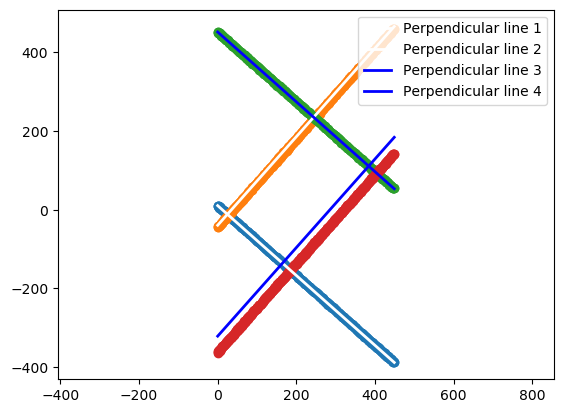

In [56]:
P=np.load('data/P2.npy')
Q=np.load('data/Q2.npy')
R=np.load("data/R2.npy")
S=np.load("data/S2.npy")

def compute_lines(P: np.array, Q: np.array,R: np.array, S: np.array) -> tuple:
    Px,Py =np.array(P[:,0]),np.array(P[:,1])
    Qx,Qy =np.array(Q[:,0]),np.array(Q[:,1])
    Rx, Ry = np.array(R[:,0]), np.array(R[:,1])
    Sx, Sy = np.array(S[:,0]), np.array(S[:,1])
    A1 = np.column_stack((np.ones(len(Px)), np.zeros(len(Px)), Px))
    A2 = np.column_stack((np.zeros(len(Qx)), np.ones(len(Qx)), Qy)) 
    A3 = np.column_stack((np.ones(len(Rx)), np.zeros(len(Rx)), Rx))
    A4 = np.column_stack((np.zeros(len(Sx)), np.ones(len(Sx)), Sy))
    b1=Py[np.newaxis].T
    b2=-Qx[np.newaxis].T
    b3=Ry[np.newaxis].T
    b4=-Sx[np.newaxis].T
    A=np.vstack((A1, A2))  
    b=np.vstack((b1,b2))
    A_=np.vstack((A3, A4))  
    b_=np.vstack((b3,b4))
    pseudoinv=np.linalg.pinv(A)
    resultA=pseudoinv@b
    c1,c2,slopeA=resultA

    pseudoinv_=np.linalg.pinv(A_)
    resultB=pseudoinv_@b_
    c3,c4,slopeB=resultB
    return c1, c2, c3, c4, slopeA, slopeB

print(compute_lines(P,Q,R,S))
c1,c2,c3,c4,slopeA,slopeB= compute_lines(P,Q,R,S)
x1 = P[:,0]
x2 = Q[:,0]
x3 = R[:,0]
x4 = S[:,0]

y1=slopeA*x1+c1
y2=(-1/slopeA)*x2+c2

y3=slopeB*x3+c3
y4=(-1/slopeB)*x4+c4

plt.scatter(P[:,0], P[:,1])
plt.scatter(Q[:,0], Q[:,1])
plt.scatter(R[:,0], R[:,1])
plt.scatter(S[:,0], S[:,1])
plt.plot(x1, y1, color='w', label='Perpendicular line 1',linewidth=2)
plt.plot(x2, y2, color='w', label='Perpendicular line 2',linewidth=2)
plt.plot(x3, y3, color='b', label='Perpendicular line 3',linewidth=2)
plt.plot(x4, y4, color='b', label='Perpendicular line 4',linewidth=2)
plt.legend()
plt.axis('equal')
plt.show()


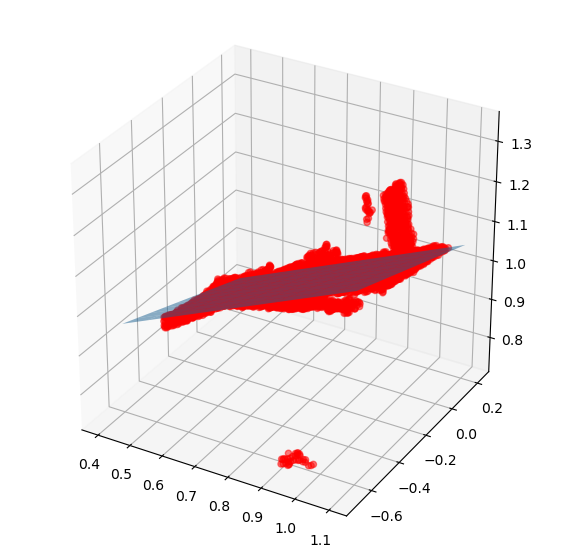

In [57]:
#RANSAC
import math
import numpy as np
def fit(points):
    a= np.hstack((points, np.ones(len(points))[np.newaxis].T))
    u ,sigma,vt=np.linalg.svd(a)
    a,b,c,d=vt[-1]
    return a,b,c,d

def ransac(points,N,min,t):
    max_inliers=0
    best_params=None

    for i in range(int(N)):
        indices=np.random.choice(points.shape[0],min,replace=False)
        select=points[indices]

        params=fit(select)
        distances=np.abs(points@params[:3]+params[3])/np.linalg.norm(params[:3])
        inliers=points[distances<t]
        num=len(inliers)

        if num>max_inliers:
            max_inliers=num
            best_params=fit(inliers)
    return best_params

point_cloud=np.genfromtxt("data/pointcloud.pcd")

# Filtering strategy
min_val = 0
max_val = 1.05
z_min = 0.75       # Points to be considered in the filtered point cloud

# Slicing the point cloud to the constraints
filter_ = (point_cloud[:, 0] >= min_val) & (point_cloud[:, 0] <= max_val) & (point_cloud[:, 2] >= z_min)

# Please assign the filtered point cloud to "points"
points = point_cloud[filter_]

p=0.99 # probab
t=0.1 # threshold
m=4 # min num of points
u = 0.7  # Represent the probability of observing an inliers
v = 1-u  # Represent the probability of observing an outlier
N=int(math.log(1-p)/math.log(1-(1-v)**m))
a,b,c,d=ransac(points,N,m,t)

x = np.linspace(0.4,1.1,10)
y = np.linspace(-0.6,0.2,10)
X,Y = np.meshgrid(x,y)

Z=(-d-a*X-b*Y)/c
fig=plt.figure(figsize=(7,7))

ax=fig.gca(projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2],c='r',alpha=0.5)
ax.plot_surface(X,Y,Z,alpha=0.5)
plt.show()


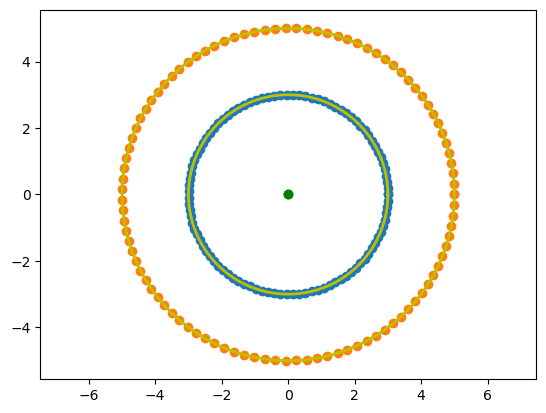

In [18]:
import numpy as np

# Outer circle parameters
outer_radius = 5
outer_center = (0, 0)

# Inner circle parameters
inner_radius = 3
inner_center = (0, 0)

# Create theta values for circle points
theta = np.linspace(0, 2 * np.pi, 100)

# Calculate outer circle points
outer_x = outer_center[0] + outer_radius * np.cos(theta)
outer_y = outer_center[1] + outer_radius * np.sin(theta)

# Calculate inner circle points
inner_x = inner_center[0] + inner_radius * np.cos(theta)
inner_y = inner_center[1] + inner_radius * np.sin(theta)

# Combine x and y coordinates for outer circle
outer_circle = np.column_stack((outer_x, outer_y))

# Combine x and y coordinates for inner circle
inner_circle = np.column_stack((inner_x, inner_y))

px,py=np.array(inner_circle[:,0]),np.array(inner_circle[:,1])
qx,qy=np.array(outer_circle[:,0]),np.array(outer_circle[:,1])
A1=np.column_stack((px,py,np.ones(len(px)),np.zeros(len(px))))
A2=np.column_stack((qx,qy,np.zeros(len(qx)),np.ones(len(qx))))

B1=(px**2 + py**2)[np.newaxis].T
B2=(qx**2 + qy**2)[np.newaxis].T
A=np.vstack((A1,A2))
B=np.vstack((B1,B2))
X=np.linalg.pinv(A)@B

a = X[0] / 2.
b = X[1] / 2.
r1 = np.sqrt(X[2] + a**2 + b**2)
r2 = np.sqrt(X[3] + a**2 + b**2)

def plot_circle(cx, cy, r):
    theta = np.linspace(0., 2 * np.pi, 100)
    x = cx + r*np.cos(theta)
    y = cy + r*np.sin(theta)
    # plot circle
    plt.plot(x, y, color='y', linewidth=2)
    # plot center
    plt.plot(cx, cy, 'o', color='g')
plt.xlim([0,7])
plt.ylim([-1,6])
plt.axis('equal')
plt.scatter(inner_circle[:,0], inner_circle[:,1])
plt.scatter(outer_circle[:,0], outer_circle[:,1])
plot_circle(a, b, r1)
plot_circle(a, b, r2)
plt.show()

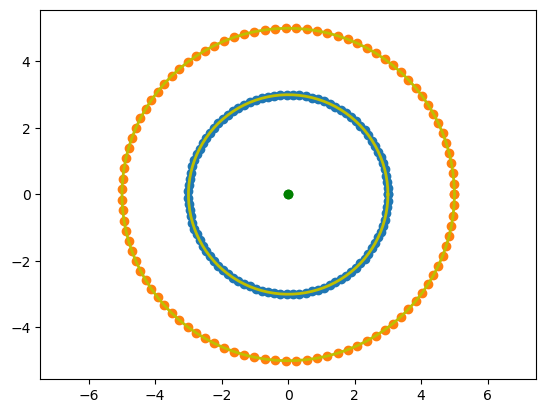

In [47]:
import numpy as np

# Outer circle parameters
outer_radius = 5
outer_center = (0, 0)

# Inner circle parameters
inner_radius = 3
inner_center = (0, 0)

# Create theta values for circle points
theta = np.linspace(0, 2 * np.pi, 100)

# Calculate outer circle points
outer_x = outer_center[0] + outer_radius * np.cos(theta)
outer_y = outer_center[1] + outer_radius * np.sin(theta)

# Calculate inner circle points
inner_x = inner_center[0] + inner_radius * np.cos(theta)
inner_y = inner_center[1] + inner_radius * np.sin(theta)

# Combine x and y coordinates for outer circle
outer_circle = np.column_stack((outer_x, outer_y))

# Combine x and y coordinates for inner circle
inner_circle = np.column_stack((inner_x, inner_y))

px,py=np.array((inner_circle[:,0])), np.array((inner_circle[:,1]))
qx,qy=np.array((outer_circle[:,0])), np.array((outer_circle[:,1]))
A1=np.column_stack((px,py,np.ones(len(px)),np.zeros(len(px))))
A2=np.column_stack((qx,qy,np.zeros(len(qx)),np.ones(len(qx))))
B1=(px**2 + py**2)[np.newaxis].T
B2=(qx**2 + qy**2)[np.newaxis].T
A=np.vstack((A1,A2))
B=np.vstack((B1,B2))
X=np.linalg.pinv(A)@B
a=X[0]/2
b=X[1]/2
r1=np.sqrt(X[2] + a**2 + b**2)
r2=np.sqrt(X[3] + a**2 + b**2)

def plot_circle(cx,cy,r):
    theta=np.linspace(0.,2*np.pi,100)
    x=cx + r*np.cos(theta)
    y=cy + r*np.sin(theta)
    plt.plot(x, y, color='y', linewidth=2)
    plt.plot(cx,cy,'o')
# plt.scatter(a,b, 'o', color='r')
plt.scatter(px, py)
plt.scatter(qx, qy)
plot_circle(a, b, r1)
plot_circle(a, b, r2)
plt.axis('equal')
plt.show()

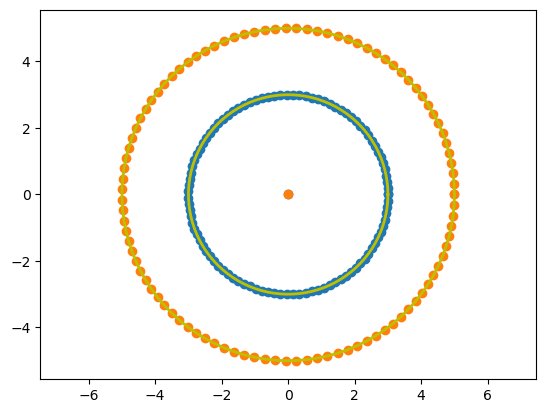